### Imports das Bibliotecas

In [1]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


### Leitura dos dados

In [2]:
dados = pd.read_csv("./dados/breast_cancer.csv", sep=",")
dados

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
170,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
171,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
172,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
173,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


### Tratamento dos Dados

In [3]:
# Metadados do dataset

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             175 non-null    int64  
 1   BMI             175 non-null    float64
 2   Glucose         175 non-null    int64  
 3   Insulin         175 non-null    float64
 4   HOMA            175 non-null    float64
 5   Leptin          175 non-null    float64
 6   Adiponectin     175 non-null    float64
 7   Resistin        175 non-null    float64
 8   MCP.1           175 non-null    float64
 9   Classification  175 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 13.8 KB


In [4]:
# Verificação de dados ausentes

dados.isna().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [5]:
# Verificação de dados duplicados

dados.duplicated().sum()

np.int64(59)

In [6]:
dados[dados.duplicated(keep=False)].sort_values(by=["Age", "BMI"])


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
60,38,22.499637,95,5.261,1.232828,8.4380,4.771920,15.73606,199.055,2
119,38,22.499637,95,5.261,1.232828,8.4380,4.771920,15.73606,199.055,2
97,40,27.636054,103,2.432,0.617890,14.3224,6.783870,26.01360,293.123,2
156,40,27.636054,103,2.432,0.617890,14.3224,6.783870,26.01360,293.123,2
90,40,30.836531,128,41.894,13.227332,31.0385,6.160995,17.55503,638.261,2
...,...,...,...,...,...,...,...,...,...,...
146,85,27.688778,196,51.814,25.050342,70.8824,7.901685,55.21530,1078.359,2
78,86,26.666667,201,41.611,20.630734,47.6470,5.357135,24.37010,1698.440,2
137,86,26.666667,201,41.611,20.630734,47.6470,5.357135,24.37010,1698.440,2
115,86,27.180000,138,19.910,6.777364,90.2800,14.110000,4.35000,90.090,2


In [7]:
# excluindo dados duplicados

dados.drop_duplicates(inplace=True)
dados

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


### Análise dos dados

In [8]:
# Correções entre as Variáveis (Feature)
dados.corr()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,1.000000,0.008530,0.230106,0.032495,0.127033,0.102626,-0.219813,0.002742,0.013462,-0.043555
BMI,0.008530,1.000000,0.138845,0.145295,0.114480,0.569593,-0.302735,0.195350,0.224038,-0.132586
Glucose,0.230106,0.138845,1.000000,0.504653,0.696212,0.305080,-0.122121,0.291327,0.264879,0.384315
Insulin,0.032495,0.145295,0.504653,1.000000,0.932198,0.301462,-0.031296,0.146731,0.174356,0.276804
HOMA,0.127033,0.114480,0.696212,0.932198,1.000000,0.327210,-0.056337,0.231101,0.259529,0.284012
Leptin,0.102626,0.569593,0.305080,0.301462,0.327210,1.000000,-0.095389,0.256234,0.014009,-0.001078
Adiponectin,-0.219813,-0.302735,-0.122121,-0.031296,-0.056337,-0.095389,1.000000,-0.252363,-0.200694,-0.019490
Resistin,0.002742,0.195350,0.291327,0.146731,0.231101,0.256234,-0.252363,1.000000,0.366474,0.227310
MCP.1,0.013462,0.224038,0.264879,0.174356,0.259529,0.014009,-0.200694,0.366474,1.000000,0.091381
Classification,-0.043555,-0.132586,0.384315,0.276804,0.284012,-0.001078,-0.019490,0.227310,0.091381,1.000000


In [9]:
# média da idades das pessoas saudáveis

idade = dados[dados['Classification'] == 1]['Age'].mean()
print(f'A média da idade das pessoas saudáveis é: {idade:.3f}')

A média da idade das pessoas saudáveis é: 58.077


In [10]:
# Média da Glicose das pessoas diagnosticadas com Cancer

glicose = dados[dados['Classification']==2]['Glucose'].mean()
print(f'A média da Glicose das pessoas diagnosticadas com câncer foi: {glicose:.3f}')

A média da Glicose das pessoas diagnosticadas com câncer foi: 105.562


<function matplotlib.pyplot.show(close=None, block=None)>

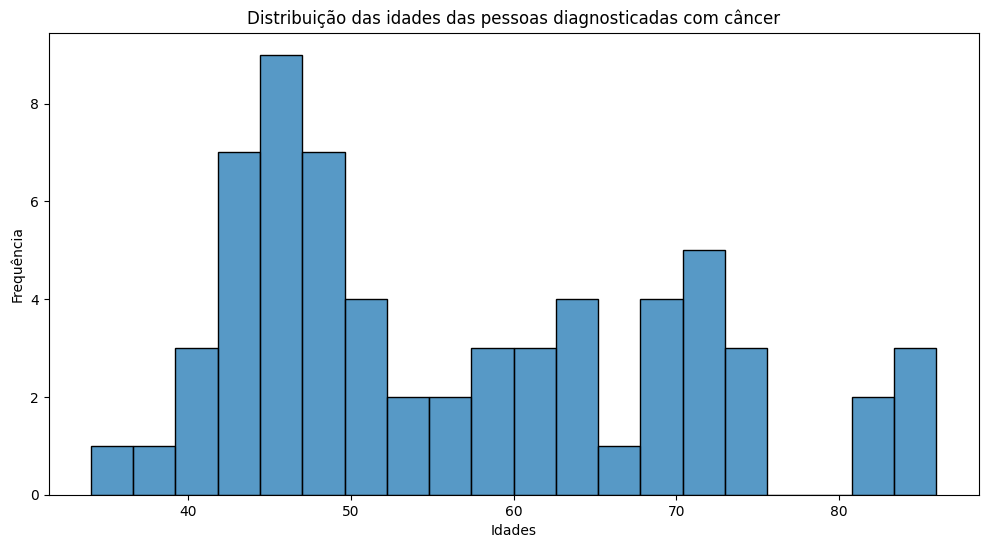

In [11]:
# Gráfico da distribuição das idades das pessoas diagnosticadas com câncer
pessoas_diagnoticadas = dados[dados['Classification'] ==2]['Age']

plt.figure(figsize=(12,6))
sns.histplot(data=pessoas_diagnoticadas, bins=20)
plt.title("Distribuição das idades das pessoas diagnosticadas com câncer")
plt.xlabel("Idades")
plt.ylabel("Frequência")
plt.show

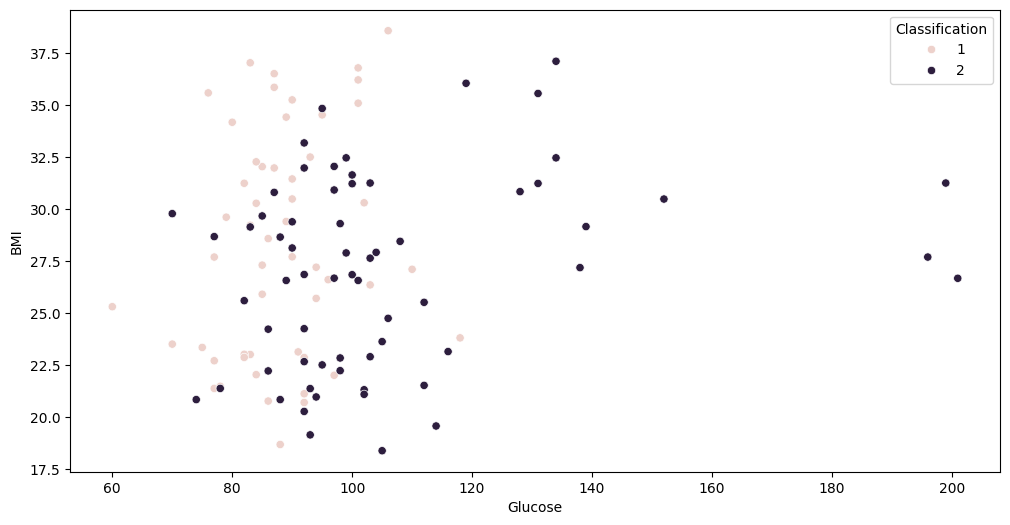

In [12]:

plt.figure(figsize=(12,6))
sns.scatterplot(data=dados, x=dados['Glucose'], y=dados['BMI'],hue='Classification')
plt.show()

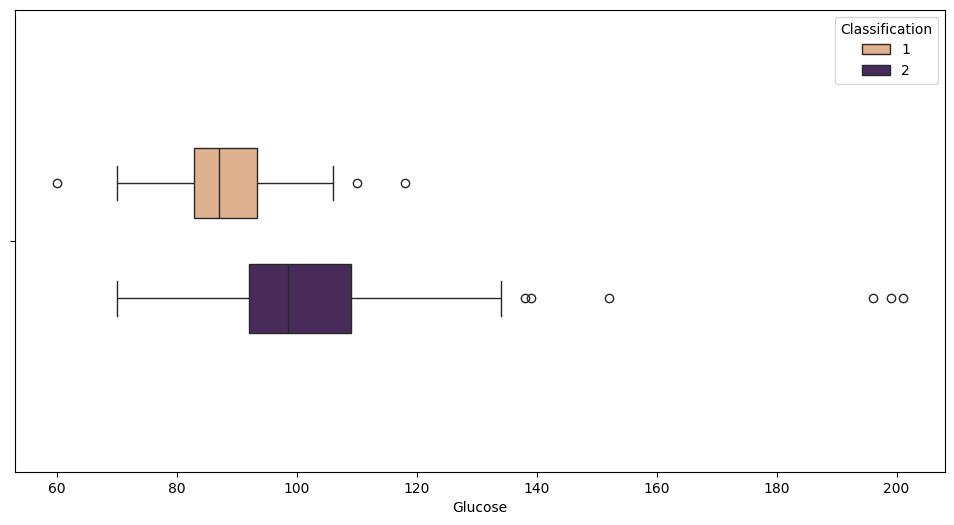

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(x=dados['Glucose'], hue=dados["Classification"], width=0.5, gap=0.4, palette="flare")
plt.show()

### Modelo Preditivo de Diagnóstico

In [14]:
# verificando o balanceamento dos dados

dados.groupby(['Classification'])['Classification'].count()

Classification
1    52
2    64
Name: Classification, dtype: int64

In [15]:
# sepanrando conjunto de dados e features e target

x_dados = dados.drop("Classification", axis="columns")
y_dados = dados["Classification"].values

In [16]:
# Função para balanceamento dos dados

def balanceamento_dados(x_dados_parametro, y_dados_paramentro):
    undersample = RandomUnderSampler(random_state=42)
    x_under, y_under = undersample.fit_resample(x_dados_parametro, y_dados_paramentro)

    t1 = TomekLinks(sampling_strategy='all') # inclui outliers
    x_under, y_under = t1.fit_resample(x_under, y_under)

    return x_under, y_under

In [17]:
# balanceando os dados

x_dados_balanceados, y_dados_balanceados = balanceamento_dados(x_dados, y_dados)
Counter(y_dados_balanceados)

Counter({np.int64(1): 45, np.int64(2): 45})

In [18]:
# separando base para teste e treino

def separa_treino_teste(x_dados, y_dados):
    x_train, x_test, y_train, y_test = train_test_split(x_dados,
                                                        y_dados,
                                                        random_state=42,
                                                        test_size=0.2)
    
    return x_train, x_test, y_train, y_test 
                                                        

In [19]:
# criando Modelo de RandomForest

x_train, x_test, y_train, y_test = separa_treino_teste(x_dados_balanceados, y_dados_balanceados)

classifier = RandomForestClassifier(random_state=42)

model = classifier.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [20]:
# Feutures Importance
index = list(x_dados.columns)
pd.DataFrame(model.feature_importances_, columns=['importance'],
             index= index).sort_values('importance', ascending=False)



,importance
Glucose,0.256440
Resistin,0.207510
BMI,0.113115
Age,0.101905
Insulin,0.081969
HOMA,0.066655
MCP.1,0.059310
Leptin,0.058534
Adiponectin,0.054562


In [21]:
# Medindo acurância

acuracia = accuracy_score(y_test, y_pred)
acuracia

0.7222222222222222

In [22]:
# gerando matriz de confusão

cm = confusion_matrix(y_test, y_pred)

Text(0.5, 1.0, 'Matriz de confusão')

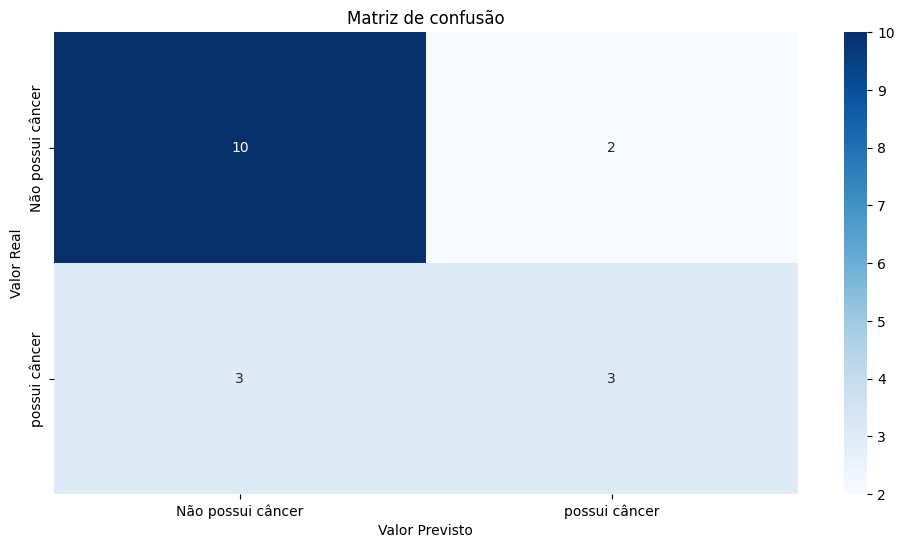

In [23]:
#Gráfica

labels = ['Não possui câncer', 'possui câncer']

plt.figure(figsize=(12,6))
sns.heatmap(
    data=cm,
    annot=True,
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels,
)
plt.xlabel('Valor Previsto')
plt.ylabel('Valor Real')
plt.title('Matriz de confusão')

In [24]:
# relatório de métricas

report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           1       0.77      0.83      0.80        12
           2       0.60      0.50      0.55         6

    accuracy                           0.72        18
   macro avg       0.68      0.67      0.67        18
weighted avg       0.71      0.72      0.72        18

